In [3]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
data = pd.read_csv(url)


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling missing values (if any)
data.dropna(inplace=True)

# Encoding categorical variables
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])

# One-hot encoding for categorical features
data = pd.get_dummies(data)

# Standardization
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data)


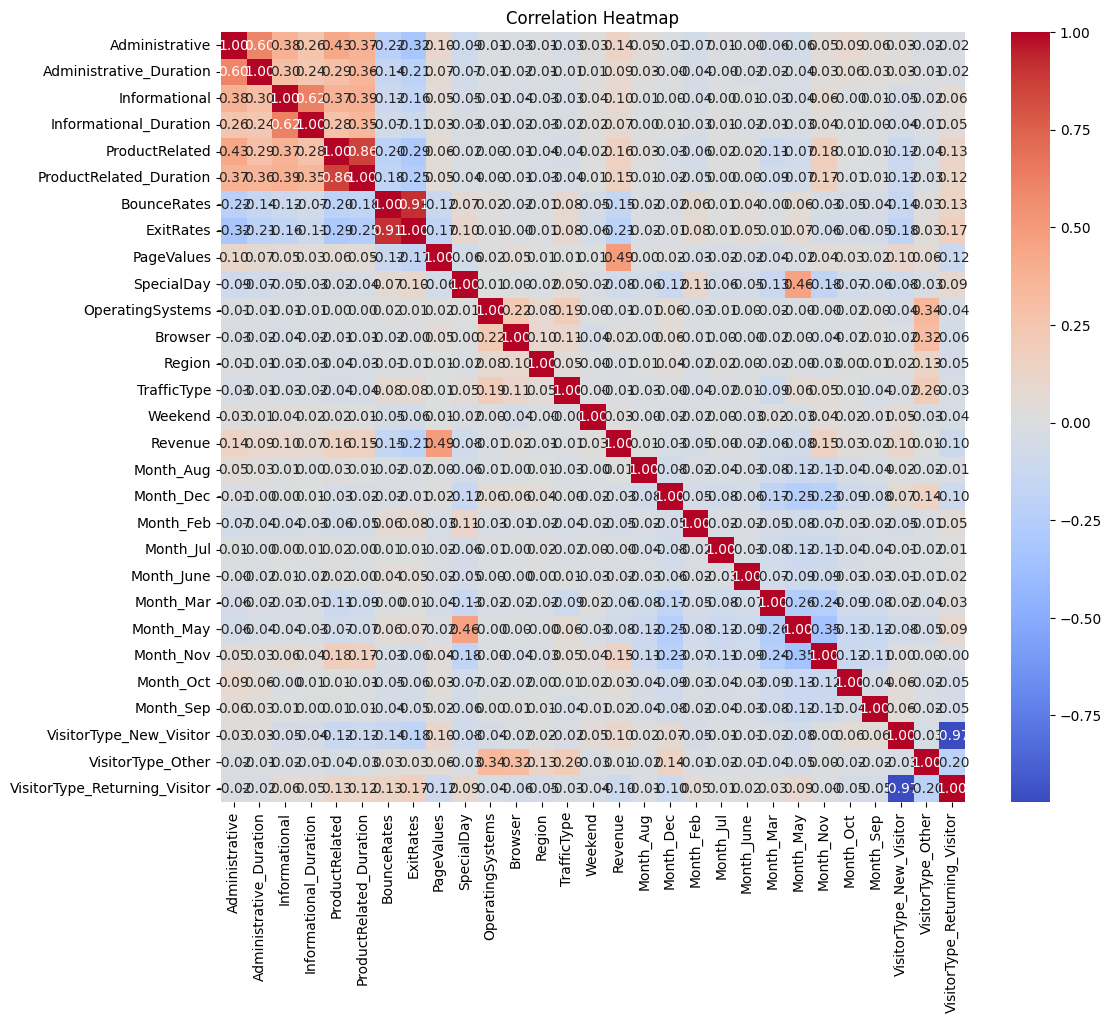

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting top k features using ANOVA F-value
X = data.drop('Revenue', axis=1)
y = data['Revenue']
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Ensure that labels are either 0 or 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train_encoded)
y_pred_euclidean = knn_euclidean.predict(X_test)

# Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train_encoded)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Minkowski distance
knn_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)  # p=3 for Minkowski distance
knn_minkowski.fit(X_train, y_train_encoded)
y_pred_minkowski = knn_minkowski.predict(X_test)



In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numerical format
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

In [24]:
accuracy_euclidean = accuracy_score(y_test_encoded, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test_encoded, y_pred_manhattan)
accuracy_minkowski = accuracy_score(y_test_encoded, y_pred_minkowski)

print("Accuracy (Euclidean Distance):", accuracy_euclidean)
print("Accuracy (Manhattan Distance):", accuracy_manhattan)
print("Accuracy (Minkowski Distance):", accuracy_minkowski)


Accuracy (Euclidean Distance): 0.875506893755069
Accuracy (Manhattan Distance): 0.8751013787510138
Accuracy (Minkowski Distance): 0.875506893755069


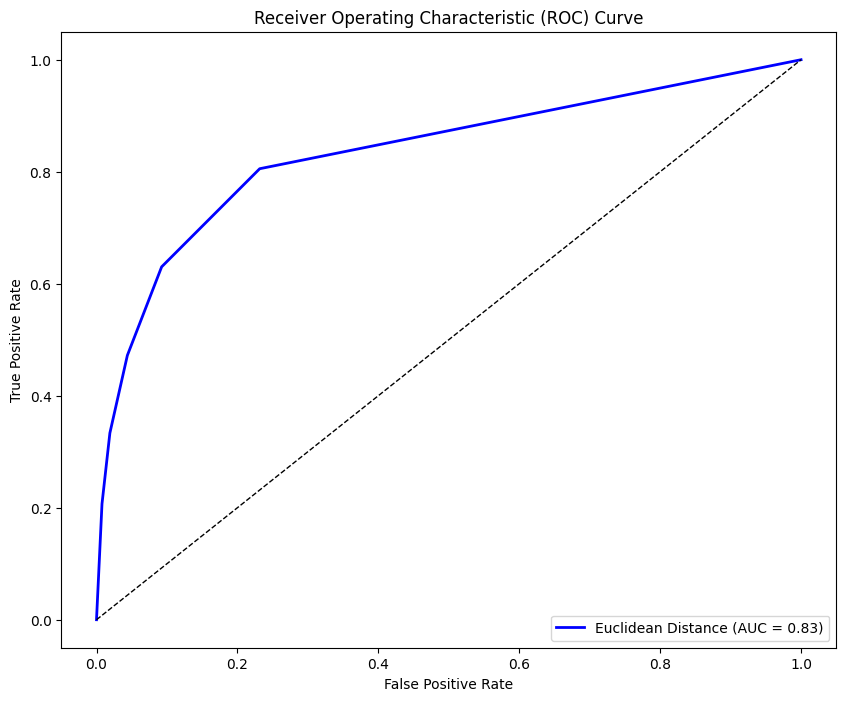

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_euclidean = knn_euclidean.predict_proba(X_test)[:, 1]
fpr_euc, tpr_euc, _ = roc_curve(y_test_encoded, y_prob_euclidean)
roc_auc_euc = roc_auc_score(y_test_encoded, y_prob_euclidean)

y_prob_manhattan = knn_manhattan.predict_proba(X_test)[:, 1]
fpr_man, tpr_man, _ = roc_curve(y_test_encoded, y_prob_manhattan)
roc_auc_man = roc_auc_score(y_test_encoded, y_prob_manhattan)

y_prob_minkowski = knn_minkowski.predict_proba(X_test)[:, 1]
fpr_mink, tpr_mink, _ = roc_curve(y_test_encoded, y_prob_minkowski)
roc_auc_mink = roc_auc_score(y_test_encoded, y_prob_minkowski)

plt.figure(figsize=(10, 8))
plt.plot(fpr_euc, tpr_euc, color='blue', lw=2, label=f'Euclidean Distance (AUC = {roc_auc_euc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


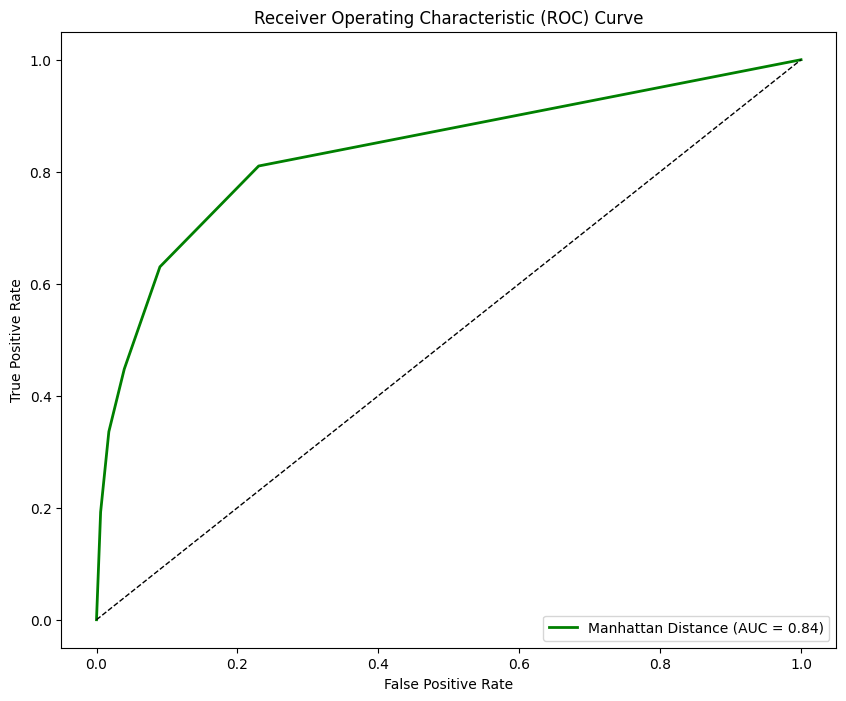

In [29]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_man, tpr_man, color='green', lw=2, label=f'Manhattan Distance (AUC = {roc_auc_man:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

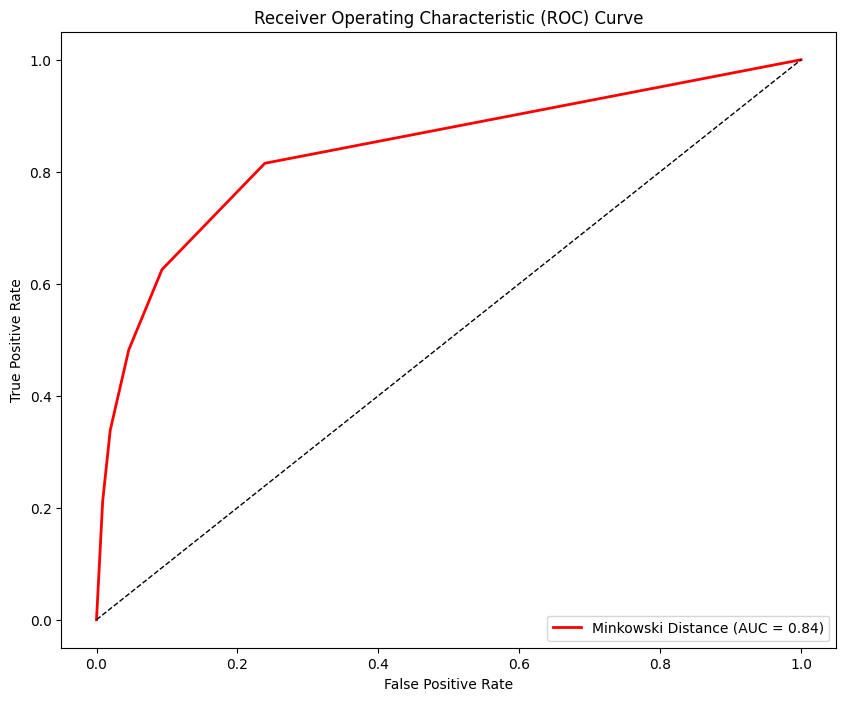

In [30]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_mink, tpr_mink, color='red', lw=2, label=f'Minkowski Distance (AUC = {roc_auc_mink:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate classification report and confusion matrix for Euclidean distance
print("Euclidean Distance:")
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_euclidean))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_euclidean))

# Calculate classification report and confusion matrix for Manhattan distance
#y_pred_manhattan_encoded = le.transform(y_pred_manhattan)
print("\nManhattan Distance:")
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_manhattan))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_manhattan))

# Calculate classification report and confusion matrix for Minkowski distance
#y_pred_minkowski_encoded = le.transform(y_pred_minkowski)
print("\nMinkowski Distance:")
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_minkowski))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_minkowski))


Euclidean Distance:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.68      0.47      0.56       411

    accuracy                           0.88      2466
   macro avg       0.79      0.71      0.74      2466
weighted avg       0.86      0.88      0.87      2466

Confusion Matrix:
[[1965   90]
 [ 217  194]]

Manhattan Distance:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.69      0.45      0.54       411

    accuracy                           0.88      2466
   macro avg       0.80      0.70      0.74      2466
weighted avg       0.86      0.88      0.86      2466

Confusion Matrix:
[[1974   81]
 [ 227  184]]

Minkowski Distance:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2055
           1    